In [1]:
from apts import *
%matplotlib inline  

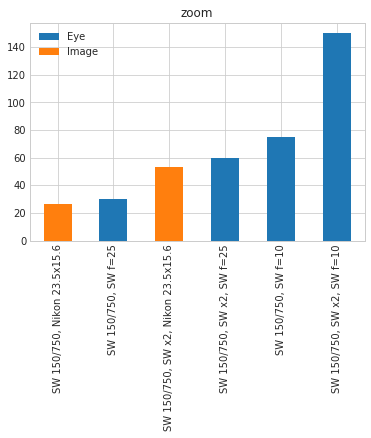

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot('zoom')

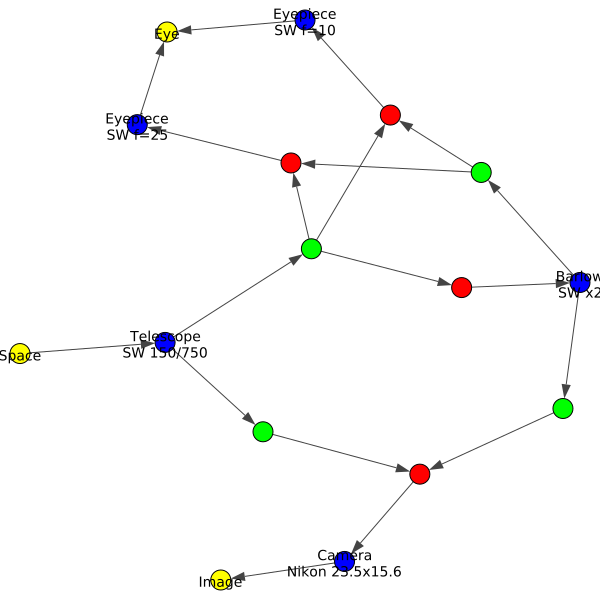

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


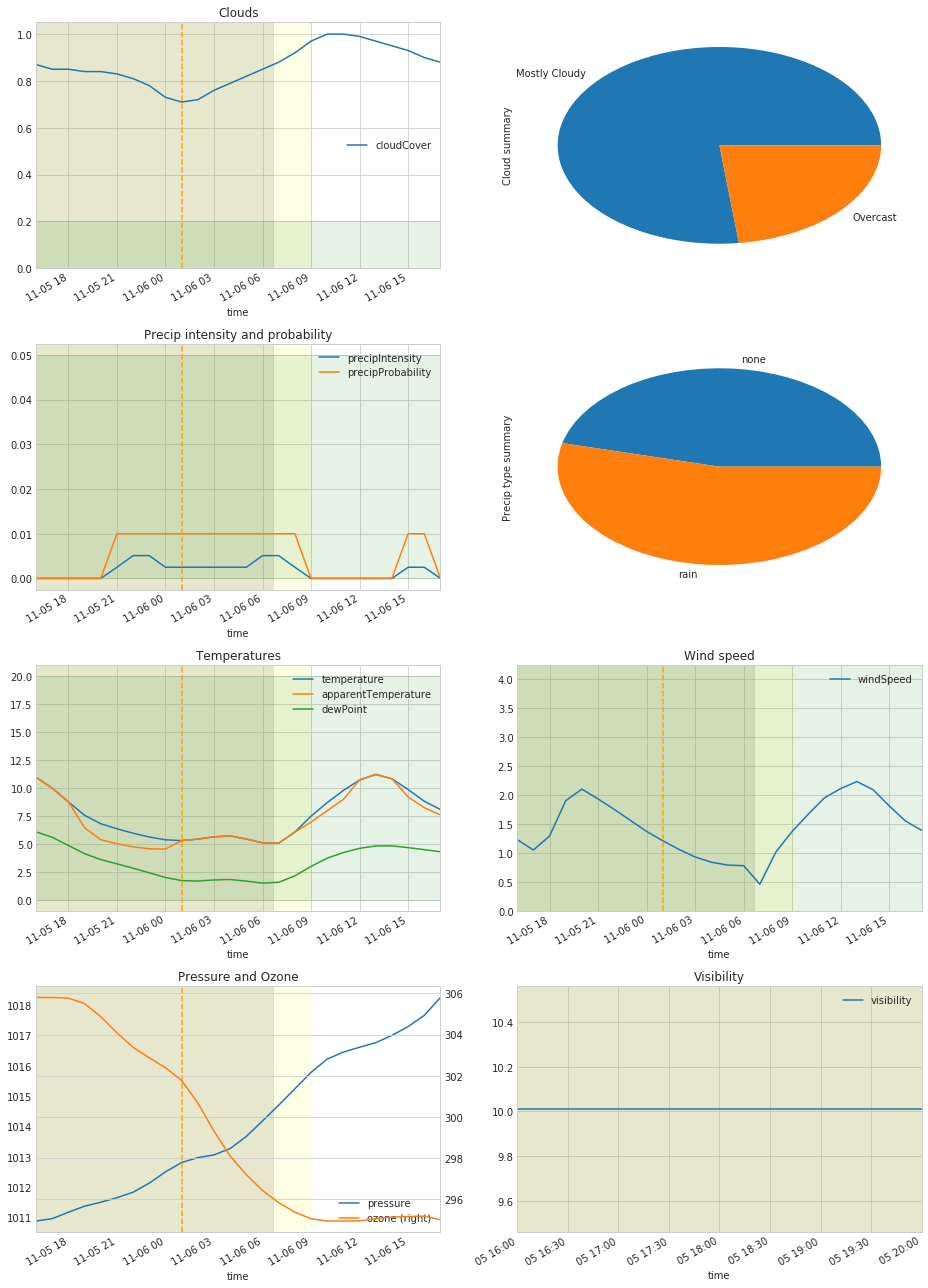

In [5]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)
o.plot_weather()

In [6]:
o.weather_is_good()

False

In [7]:
#n = Notify('example@example.com')
#n.send(o)

In [8]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
28,M29,-,NGC 6913,Open Cluster,Cygnus,7.1,4000,20.398333,38.533333,7.0,7.0,2017-11-05 17:05:06.393132+01:00,78.436595
14,M15,-,NGC 7078,Globular Cluster,Pegasus,6.2,33600,21.500000,12.166667,12.3,12.3,2017-11-05 18:11:13.901316+01:00,52.096913
38,M39,-,NGC 7092,Open Cluster,Cygnus,5.2,825,21.536667,48.433333,32.0,32.0,2017-11-05 18:13:13.159067+01:00,88.354637
1,M2,-,NGC 7089,Globular Cluster,Aquarius,6.5,37500,21.558333,-0.816667,12.9,12.9,2017-11-05 18:14:46.527179+01:00,39.120424
29,M30,-,NGC 7099,Globular Cluster,Capricornus,7.2,24800,21.673333,-23.183333,11.0,11.0,2017-11-05 18:21:44.815873+01:00,16.786310
51,M52,-,NGC 7654,Open Cluster,Cassiopeia,7.3,5000,23.403333,61.583333,13.0,13.0,2017-11-05 20:05:05.781985+01:00,78.481872
109,M110,Satellite of M31,NGC 205,Elliptical Galaxy,Andromeda,8.5,2900000,0.673333,41.683333,17.0,10.0,2017-11-05 21:21:15.105951+01:00,81.621287
31,M32,Satellite of M31,NGC 221,Elliptical Galaxy,Andromeda,8.1,2900000,0.711667,40.866667,8.0,6.0,2017-11-05 21:23:32.805135+01:00,80.804608
30,M31,Andromeda Galaxy,NGC 224,Spiral Galaxy,Andromeda,3.4,2900000,0.711667,41.266667,178.0,63.0,2017-11-05 21:23:32.873369+01:00,81.204502
102,M103,-,NGC 581,Open Cluster,Cassiopeia,7.4,8000,1.553333,60.700000,6.0,6.0,2017-11-05 22:14:08.807035+01:00,79.374988


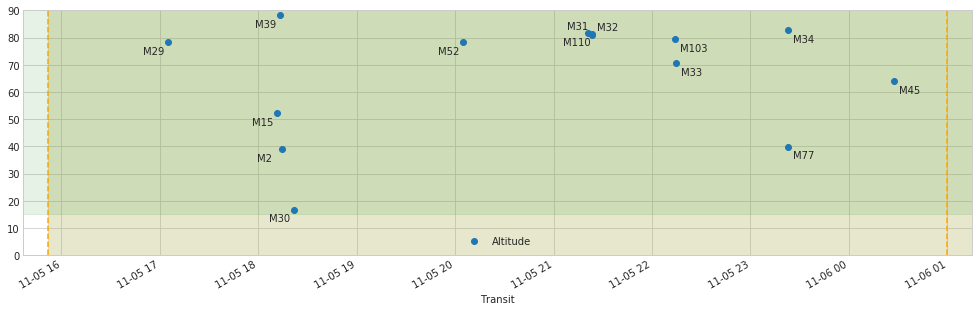

In [9]:
o.plot_visible_messier()

In [10]:
o.get_visible_messier().to_html('/tmp/list.html')

In [11]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)